## Introduction


This notebook aims to highlight routes with high and/or increasing congestion scores from the Peak Hour Expansion Factor (PHEF) layers on Pathways for Planning and provide strategies aimed at limiting the increase in congestion along these routes and easing congestion overall. Starting with the 2018 data, the peak hour scoring has been divided into categories, with a higher number indicating the number of times a particular segment is congested per day. A minimum score of 1.5 is needed for a route to be considered congested. 1.5 = 50% more travel time along a route than the free flowing travel time. Additionally, SMART SCALE does not differentiate between PHEF values once they have exceeded 5.

SMART SCALE is a planning process that ensures effective use of funding for transportation projects in Virginia. Among the major measures that influence the SMART SCALE process, congestion is a big factor. The congestion factor is made up of two measures: Person Throughput and Person Hours of Delay, both equally weighted at 50%. Districts also have their own priority weights but we will be using the standard weights as the basis for our analysis. Since PHEF (also know as PPEF) is used as a measure Person Hours of Delay it is a good indicator of overall congestion.   

### Imports

In [1]:
import cartoframes
import pathways
from cartoframes.viz import Map, Layer, color_category_style
from pathways.auth import set_default_credentials
from pathways.catalog import search
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathways.display import display_info

In [2]:
cartoframes.utils.setup_metrics(False)

### Setting up Pathways client

In [3]:
#set_default_credentials('creds.json')

### Source Datasets for Analysis

In [4]:
datasets = search('expansion')
datasets

,Id,Name,DisplayName,GeometryType
0,d59fd5a8-d375-48f7-90cc-5b4d2e9ffe44,Peak Hour Expansion Factor 2020,Peak Hour Expansion Factor 2020,LrsLine
1,55cf50b3-882b-4b8d-bbcf-7d48ea749cd3,Peak Hour Expansion Factor Weekday 2018,Peak Hour Expansion Factor Weekday 2018,LrsLine
2,7e7ba4ee-f690-46e5-a214-58b730deeec6,Peak Hour Expansion Factor Weekday 2019,Peak Hour Expansion Factor Weekday 2019,LrsLine
3,c04d3c37-2824-4ecf-81b1-8140726bb745,Peak Hour Expansion Factor Weekend 2018,Peak Hour Expansion Factor Weekend 2018,LrsLine
4,94fa7469-a435-4794-a2e5-4a5ba3f7aa32,Peak Hour Expansion Factor Weekend 2019,Peak Hour Expansion Factor Weekend 2019,LrsLine
5,22802ade-9a85-4ac8-a7d0-508f29ddd4cb,Peak Hourly Expansion Factor 2017,Peak Hourly Expansion Factor 2017,Polyline
6,00a0686e-ac15-413d-8145-9835e8718b6f,Weighted Peak Hour Expansion Factor 2018,Weighted Peak Hour Expansion Factor 2018,LrsLine
7,ce03f8e8-82d6-4d48-9b7e-d58677d9b67b,Weighted Peak Hour Expansion Factor 2019,Weighted Peak Hour Expansion Factor 2019,LrsLine


Next, we will read in the datasets that we will use for analysis, assigning each to a variable.

In [5]:

phef2018weekday_df = pathways.read_dataset('55cf50b3-882b-4b8d-bbcf-7d48ea749cd3')
phef2018weekend_df = pathways.read_dataset('c04d3c37-2824-4ecf-81b1-8140726bb745')
phef2019weekday_df = pathways.read_dataset('7e7ba4ee-f690-46e5-a214-58b730deeec6')
phef2019weekend_df = pathways.read_dataset('94fa7469-a435-4794-a2e5-4a5ba3f7aa32')
phef2020_df = pathways.read_dataset('d59fd5a8-d375-48f7-90cc-5b4d2e9ffe44')


downloading from pathways:: 28.2MB [00:02, 10.2MB/s]                                                                   
downloading from pathways:: 28.2MB [00:03, 8.36MB/s]                                                                   
downloading from pathways:: 28.2MB [00:03, 7.36MB/s]                                                                   
downloading from pathways:: 28.2MB [00:03, 9.07MB/s]                                                                   
downloading from pathways:: 26.8MB [00:04, 5.99MB/s]                                                                   


### Preparing Data for Anaylsis

To begin, we will examine the Congestion (PHEF) Score distribution in the 2018 datasets. First we will create a subset of the data that identifies routes that are considered congested and plot the data to see the distribution.

In [6]:
subset_phef2018weekday_df = phef2018weekday_df[(phef2018weekday_df.PHEF >= 1.5)]

<AxesSubplot:xlabel='PHEF', ylabel='Count'>

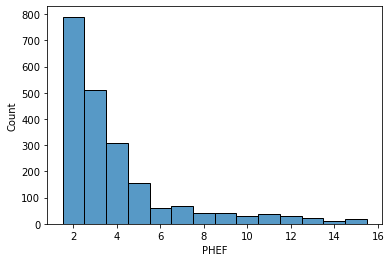

In [7]:
sns.histplot(data=subset_phef2018weekday_df, x='PHEF', binwidth = 1)

From the graph we can see that the the majority of congested routes are concentrated under 5 PHEF Score, primarily within the 1.5-4.5 Score range. However, this is only a piece of the data that we will need to analyze route congestion over time. Next we will calculate the percentage congested routes make up of the total route features.  

In [8]:
# Get a count of the number of congested routes for 2018 weekday (2126)
subset_phef2018weekday_df.count()

Shape_Length    2126
RTE_NM          2075
FROM_MEASURE    1871
TO_MEASURE      1871
TMC             2126
                ... 
AM_MAX          2126
PM_MAX          2126
AM_PHEF         2126
PM_PHEF         2126
geometry        1871
Length: 86, dtype: int64

In [9]:
# Percent of the 2018 weekday data that is congested
congested2018weekday = subset_phef2018weekday_df.count()
percent2018weekday =congested2018weekday.divide(other = 21672)
print(percent2018weekday.PHEF)

0.09809892949427833


From these calculations, we can see that the percentage of congested routes in the 2018 weekday data is 9.81%. Next we will follow the same process for the weekend 2018 data. Both feature classes have a total number of 21672 route features.

In [10]:
# Get the same count of congested routes for 2018 weekend data
subset_phef2018weekend_df = phef2018weekend_df[(phef2018weekend_df.PHEF >= 1.5)]

<AxesSubplot:xlabel='PHEF', ylabel='Count'>

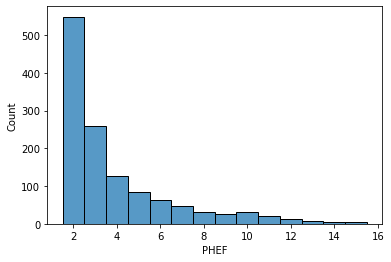

In [11]:
#Plot the distribution of congested routes
sns.histplot(data=subset_phef2018weekend_df, x='PHEF', binwidth = 1)

In [12]:
# 1267 routes are congested 
subset_phef2018weekend_df.count()

Shape_Length    1267
RTE_NM          1241
FROM_MEASURE    1088
TO_MEASURE      1088
TMC             1267
                ... 
AM_MAX          1267
PM_MAX          1267
AM_PHEF         1267
PM_PHEF         1267
geometry        1088
Length: 86, dtype: int64

In [13]:
# Percent of the 2018 weekend data that is congested
congested2018weekend = subset_phef2018weekend_df.count()
percent2018weekend =congested2018weekend.divide(other = 21672)
print(percent2018weekend.PHEF)

0.058462532299741604


Now that we have the percentages and distribution for the 2018 data we will do the same for the 2019 data. 

<AxesSubplot:xlabel='PHEF', ylabel='Count'>

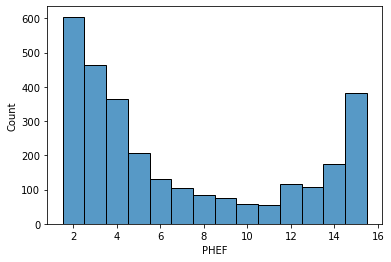

In [14]:
# Calculating 2019 weekday data
subset_phef2019weekday_df = phef2019weekday_df[(phef2019weekday_df.PHEF >= 1.5)]
sns.histplot(data=subset_phef2019weekday_df, x='PHEF', binwidth = 1)

In [15]:
# Calculating percentage of total routes that are congested
congested2019weekday = subset_phef2019weekday_df.count()
percent2019weekday =congested2019weekday.divide(other = 21672)
print(percent2019weekday.PHEF)

0.1352436323366556


<AxesSubplot:xlabel='PHEF', ylabel='Count'>

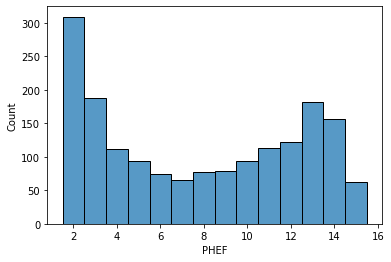

In [16]:
# Calculating 2019 weekend data
subset_phef2019weekend_df = phef2019weekend_df[(phef2019weekend_df.PHEF >= 1.5)]
sns.histplot(data=subset_phef2019weekend_df, x='PHEF', binwidth = 1)

In [17]:
# Calculating percentage of total routes that are congested
congested2019weekend = subset_phef2019weekend_df.count()
percent2019weekend =congested2019weekend.divide(other = 21672)
print(percent2019weekend.PHEF)

0.07964193429309709


### 2018-2019 comparisons

Now that we have both the 2018 and 2019 data we can begin to draw conclusions from it. First we will plot the distribution of the weekday data together.

<AxesSubplot:xlabel='PHEF', ylabel='Count'>

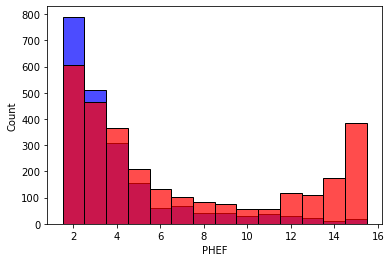

In [18]:
# Comparing 2018-2019 weekday data
# Distribution of congested routes shifts drastically
sns.histplot(data=subset_phef2018weekday_df, x='PHEF', binwidth = 1, color = 'blue', alpha =.7)
sns.histplot(data=subset_phef2019weekday_df, x='PHEF', binwidth = 1, color= 'red', alpha=.7)

The shift in the distribution of routes among the PHEF scoring categories is the most important change to note. In 2018 the largest number of congested routes is within the 1.5-2.5 score range, a relatively small peak travel time period. In 2019, while the 1.5-2.5 score category appears to remain dominant if we combine the 2019 score categories that are 5 PHEF score or above...

In [19]:
above52019weekday = phef2019weekday_df[(phef2019weekday_df.PHEF >= 5)]
above52019weekday.count()

Shape_Length    1377
RTE_NM          1365
FROM_MEASURE    1160
TO_MEASURE      1160
TMC             1377
                ... 
F9_00_PM        1377
PHEF            1377
AM_MAX          1377
PM_MAX          1377
geometry        1160
Length: 84, dtype: int64

we can see that the 5 or greater PHEF scores are significantly higher than the number of congested routes within the 1.5-2.5 PHEF score range. 

Of the 21,672 features within the 2018 and 2019 Weekday PHEF layers 2,126 (9.81%) and 2,931 (13.52%) features have been flagged as congested respectively. Since we know that there was no increase in total features, what is the cause of this increase in heavily congested routes? 

Taking a broader look at these datasets in geospatial applications we can see that the features within the 5+ PHEF score categories are relatively small when compared with less congested route features. To confirm whether this is a trend we will construct a query based around the shape_length field. 

In [20]:
# Calculating the number of highly congested routes under 100 meters in length
smallcongestedroutesweekday2019 = above52019weekday[(above52019weekday.Shape_Length <= 100)]
smallcongestedroutesweekday2019.count()

Shape_Length    981
RTE_NM          969
FROM_MEASURE    764
TO_MEASURE      764
TMC             981
               ... 
F9_00_PM        981
PHEF            981
AM_MAX          981
PM_MAX          981
geometry        764
Length: 84, dtype: int64

In [21]:
# Percentage of highly congested routes that are under 100 meters
shortcongested2019weekday = smallcongestedroutesweekday2019.count()
percentshort2019weekday =shortcongested2019weekday.divide(other = 1377)
print(percentshort2019weekday.PHEF)

0.7124183006535948


981 of the 1377 (71.2%) route segments with PHEF scores of 5 or higher were found to be 100 meters or less in length. All of which are in the immediate vicinity of an intersection. 

In [22]:
above52019weekend = phef2019weekend_df[(phef2019weekend_df.PHEF >= 5)]
above52019weekend.count()

Shape_Length    1068
RTE_NM          1056
FROM_MEASURE     900
TO_MEASURE       900
TMC             1068
                ... 
F9_00_PM        1068
PHEF            1068
AM_MAX          1068
PM_MAX          1068
geometry         900
Length: 84, dtype: int64

In [23]:
shortcongestedroutesweekend = above52019weekend[(above52019weekend.Shape_Length <= 100)]
shortcongestedroutesweekend.count()

Shape_Length    776
RTE_NM          764
FROM_MEASURE    608
TO_MEASURE      608
TMC             776
               ... 
F9_00_PM        776
PHEF            776
AM_MAX          776
PM_MAX          776
geometry        608
Length: 84, dtype: int64

In [24]:
shortcongested2019weekend = shortcongestedroutesweekend.count()
percentshort2019weekend =shortcongested2019weekend.divide(other = 1068)
print(percentshort2019weekend.PHEF)

0.7265917602996255


<AxesSubplot:xlabel='PHEF', ylabel='Count'>

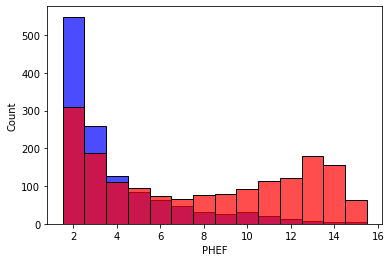

In [28]:
# The shift in congested route distribution is supported by the 2019 weekend data
sns.histplot(data=subset_phef2018weekend_df, x='PHEF', binwidth = 1, color = 'blue', alpha =.7)
sns.histplot(data=subset_phef2019weekend_df, x='PHEF', binwidth = 1, color= 'red', alpha=.7)

The 2019 Weekend data also conforms to the trend with 778 of the 1068 (72.3%) congested route segments with PHEF scores above 5 measuring 100 meters or less in length located at an intersection. 

The sharp increase in congested routes with extreme peak travel time periods from year to year is a concerning trend. Suggesting that, at peak travel times along these routes, the infrastructure in place is under equipped to deal with the intensity of traffic flow.

### 2019-2020

Since the 2020 weekend and weekday data is combined into one overall dataset we will split the dataset up into subsets containing weekday and weekend data respectively first. Fortunately, within the dataset there are specific fields that will facilitate the creation of these subsets

In [27]:
phef2020weekday = phef2020_df[(phef2020_df.WD_PHEF > 0)]
phef2020weekend = phef2020_df[(phef2020_df.WE_PHEF > 0)]

In [39]:
# Calculating the percentage of Weekday routes that are congested of the total number of routes
subset_phef2020weekday = phef2020weekday[(phef2020weekday.WD_PHEF >= 1.5)]
congested2020weekday = subset_phef2020weekday.count()
percentcongested2020weekday = congested2020weekday.divide(other = 21672)
print(percentcongested2020weekday.WD_PHEF)

0.09800664451827243


<AxesSubplot:xlabel='WD_PHEF', ylabel='Count'>

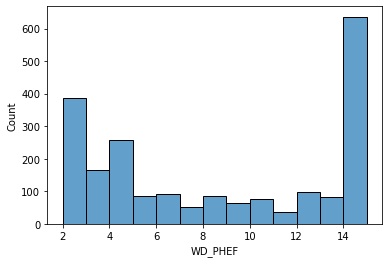

In [33]:
sns.histplot(data=subset_phef2020weekday, x='WD_PHEF', binwidth = 1, alpha=.7)

There is a decrease in overall features for the weekday data (down 807 features from 2019 or 3.72%) but the trend of highly congested routes from the 2019 data continues. Let us verify with the weekend data.

In [40]:
subset_phef2020weekend = phef2020weekend[(phef2020weekend.WE_PHEF >= 1.5)]
congested2020weekend = subset_phef2020weekend.count()
percentcongested2020weekend = congested2020weekend.divide(other = 21672)
print(percentcongested2020weekend.WE_PHEF)

0.0665374677002584


<AxesSubplot:xlabel='WE_PHEF', ylabel='Count'>

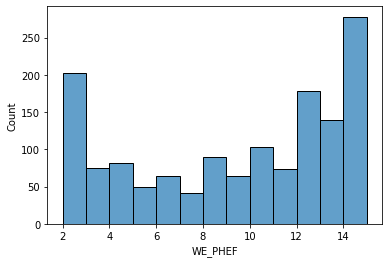

In [41]:
sns.histplot(data=subset_phef2020weekend, x='WE_PHEF', binwidth = 1, alpha=.7)

The 2020 Weekend subset confirms that the trend of congested routes with high PHEF scores continues through 2020 despite an overall drop in features (down 284 features or 1.31% from 2019). What could have caused the decrease? 

We know that Congestion is a major factor in the SMART SCALE planning process. Assuming for the moment that the 2019 PHEF data led to projects aimed to reduce congestion on routes with higher PHEF scores, let's find out if there was a reduction in highly congested features within the vicinity of an intersection. Given that the features less than 100 m in length made up the majority of highly congested features in 2019 it makes sense to analyze the 2020 data from the same angle. To do this we will compare the percentages from 2019 to 2020.

In [91]:
# Number of highly congested features 2020 weekday
subset_congested2020weekday = phef2020weekday[(phef2020weekday.WD_PHEF >=5)]
subset_congested2020weekday.count()


RTE_NM          1299
FROM_MEASURE    1097
TO_MEASURE      1097
TMC             1311
TMCSEQUENC      1311
STARTNODE       1311
STARTNODER      1311
STARTOFFSE      1311
STARTMILEP      1311
ENDNODE         1311
ENDNODEROU      1311
ENDOFFSET       1311
ENDMILEPOI      1311
LOC_ERROR       1311
TMC_ROAD        1311
TMC_DIRECT      1311
Intersection    1311
Miles           1311
WD_PHEF         1311
WE_PHEF         1311
Weight_PHEF     1311
Shape_Length    1311
geometry        1097
dtype: int64

In [92]:
# Number of highly congested features 2020 weekday less than 100 meters 
shorthighcongested2020weekday = subset_congested2020weekday[(subset_congested2020weekday.Shape_Length <=100)]
shorthighcongested2020weekday.count()

RTE_NM          986
FROM_MEASURE    784
TO_MEASURE      784
TMC             998
TMCSEQUENC      998
STARTNODE       998
STARTNODER      998
STARTOFFSE      998
STARTMILEP      998
ENDNODE         998
ENDNODEROU      998
ENDOFFSET       998
ENDMILEPOI      998
LOC_ERROR       998
TMC_ROAD        998
TMC_DIRECT      998
Intersection    998
Miles           998
WD_PHEF         998
WE_PHEF         998
Weight_PHEF     998
Shape_Length    998
geometry        784
dtype: int64

In [93]:
# Percent of 2020 weekday high congestion features less than 100 meters
highcongestedweekday2020 = shorthighcongested2020weekday.count()
percenthighcongested2020weekday = highcongestedweekday2020.divide(other = 1311)
print(percenthighcongested2020weekday.WD_PHEF)

0.7612509534706331


In [94]:
# Number of highly congested features 2020 weekend
subset_congested2020weekend = phef2020weekend[(phef2020weekend.WE_PHEF >=5)]
subset_congested2020weekend.count()

RTE_NM          1074
FROM_MEASURE     909
TO_MEASURE       909
TMC             1082
TMCSEQUENC      1082
STARTNODE       1082
STARTNODER      1082
STARTOFFSE      1082
STARTMILEP      1082
ENDNODE         1082
ENDNODEROU      1082
ENDOFFSET       1082
ENDMILEPOI      1082
LOC_ERROR       1082
TMC_ROAD        1082
TMC_DIRECT      1082
Intersection    1082
Miles           1082
WD_PHEF         1082
WE_PHEF         1082
Weight_PHEF     1082
Shape_Length    1082
geometry         909
dtype: int64

In [95]:
# Number of highly congested features 2020 weekend less than 100 meters 
shorthighcongested2020weekend = subset_congested2020weekend[(subset_congested2020weekend.Shape_Length <=100)]
shorthighcongested2020weekend.count()

RTE_NM          813
FROM_MEASURE    648
TO_MEASURE      648
TMC             821
TMCSEQUENC      821
STARTNODE       821
STARTNODER      821
STARTOFFSE      821
STARTMILEP      821
ENDNODE         821
ENDNODEROU      821
ENDOFFSET       821
ENDMILEPOI      821
LOC_ERROR       821
TMC_ROAD        821
TMC_DIRECT      821
Intersection    821
Miles           821
WD_PHEF         821
WE_PHEF         821
Weight_PHEF     821
Shape_Length    821
geometry        648
dtype: int64

In [97]:
# Percent of 2020 weekend high congestion features less than 100 meters
highcongestedweekend2020 = shorthighcongested2020weekend.count()
percenthighcongested2020weekend = highcongestedweekend2020.divide(other = 1082)
print(percenthighcongested2020weekend.WE_PHEF)

0.7587800369685767


The percentages for both 2020 weekday(76.13%) and 2020 weekend (76%) indicate that our earlier assumption was incorrect as both percentages increased from the previous year. 

Another explanation for the decrease in overall congested features in 2020 is the impact of the COVID-19 virus on vehicular transportation. To be sure we will pull in data from the Bureau of Transporation Statistics which is in the Public Domain. The dataset we will use is Trips by Distance, limited to the calendar year of 2020 and the state of Virginia. Due to access token restrictions, I have provided the subset of the data that we will need as an excel document instead of directly accessing the data via API. The full dataset is available here https://data.bts.gov/Research-and-Statistics/Trips-by-Distance/w96p-f2qv 

Download the TripsbyDistanceVA2020 Excel Document from the congestion folder and copy the path full file path to the single quoted section below

In [148]:
# importing BTS dataset (confirm that openpyxl package is installed before this step)
VATrips2020 = pd.read_excel('D:\PHEF Case Study\TripsbyDistanceVA2020.xlsx')
VATrips2020.head()

,Date,Month,Selected State,Selected Set,Level,State Code,Percent of People Staying at Home,Population Not Staying at Home,Population Staying at Home,Trips,...,Trips 100-250 Miles,Trips 25-50 Miles,Trips 250-500 Miles,Trips 3-5 Miles,Trips 5-10 Miles,Trips 50-100 Miles,Trips 500+ Miles,Trips <1 Mile,Value Formatted for Tooltip,Value of Selected Metric
0,2020-01-01,January,True,1,State,VA,23.941,6478489,2039196,25522612,...,218636,1173743,50974,3260308,4016041,423739,21559,6264548,25522612,25522612
1,2020-01-02,January,True,1,State,VA,19.651,6843871,1673814,31526413,...,185189,1632255,40252,3902898,4996092,526131,16735,7662540,31526413,31526413
2,2020-01-03,January,True,1,State,VA,19.589,6849158,1668527,31806752,...,199343,1629397,40149,4005394,5113597,515820,17196,7526564,31806752,31806752
3,2020-01-04,January,True,1,State,VA,21.682,6670860,1846825,29569361,...,217323,1352862,45055,3870885,4740812,478608,19441,7022907,29569361,29569361
4,2020-01-05,January,True,1,State,VA,23.165,6544589,1973096,26772185,...,213078,1135395,48454,3558446,4399892,409054,24463,6269765,26772185,26772185


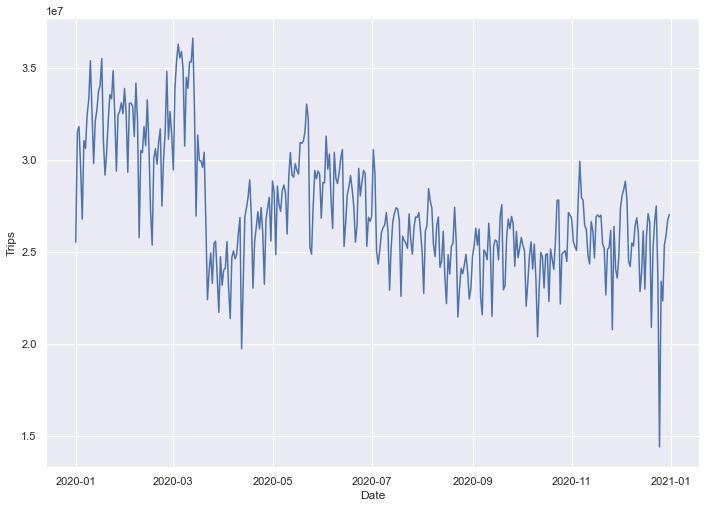

In [160]:
# Plot Trips per day for 2020
TripsDay = sns.lineplot(data=VATrips2020, x='Date', y='Trips')

 Above is a line plot with the daily fluctuations shown. The graph will work but there is a better way to display the trends in the data. 

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


C:\ProgramData\Anaconda3\envs\pathways-ds\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


[Text(0, 0.5, 'Trips(Tens of Millions)')]

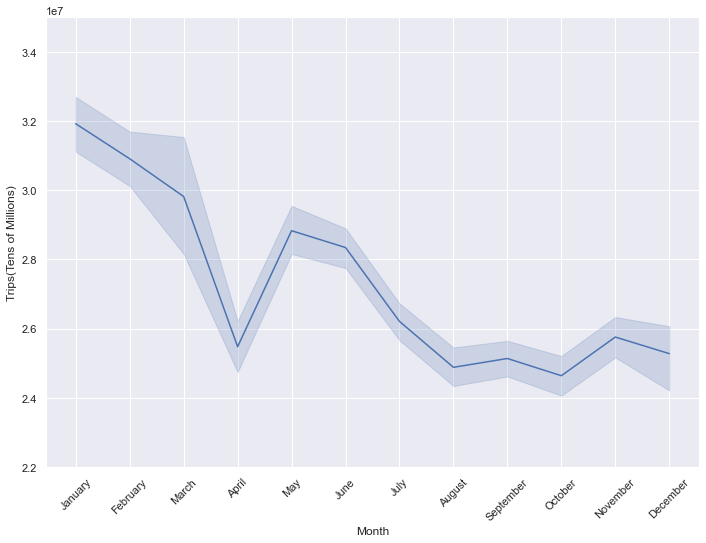

In [172]:
# Plot Trips per Month for 2020 
Trips = sns.lineplot(data=VATrips2020, x='Month', y='Trips')
# Writing labels to a variable 
labels=(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
#Manipulating label position, y ranges, and y axis label
Trips.set_xticklabels(labels, rotation=45)
Trips.set_ylim(22000000,35000000)
Trips.set(ylabel='Trips(Tens of Millions)')

The graph below shows the mean of total trips as the solid line with the variance showing in the lightly shaded area around the line. This graph does a much better job of displaying the overall trend but does miss some of the peaks and valleys of the daily chart.

Both charts show that the number of trips decreased significantly with large fluctuations during March, April, and May; the first few months when restrictions tightened to stop the spread of COVID-19. Excluding these months travel trended downward steadily throughout the year, decreasing by nearly 10 million from the highest peak to the lowest valley and around 6.6 million when comparing the starting and ending month averages. 

The impact that this massive decrease in trips had on congestion is evident as the total numbers of congested routes fell from 2019 to 2020 on both the weekday and weekend. However, we know from our previous calculations that the decrease in trips had little impact on the routes with severe congestion issues. 

The continued rise in congested route features with extreme travel time solidifies the trend that initially was observed in the 2018-2019 comparison. Given the prevalence of intersections among the congested features as well as the rapid uptick in peak travel time length, what are some methods for combating congestion and improving traffic flow?

## Conclusions

As far as physical infrastructure is concerned, there are a variety of improvements that can be made to ease congestion by improving the flow of traffic. Setting aside improvements that focus on increasing the physical size of the intersection (adding more lanes, allowing more turning space in the intersection, etc.) roundabouts are an effective method of limiting congestion as they provide near-continuous traffic flow around an intersection. Roundabouts negate the need for traffic signal systems and facilitate quick ingress/egress of intersections. Roundabouts are already utilized across Virginia, notably in Richmond along Monument Avenue and the Laburnam Ave intersection with Interstate-195.  



Another avenue of traffic easing is alternative transportation. Mass Transit Systems such as bus, metro, and train networks allow large numbers of people to move around cities and states with relative ease. Proper implementation, utilization, and maintenance of these systems has the added benefit of reducing overall CO2 emissions while reducing travel time. Though such programs carry with them a large cost, the long term payoff is almost always worth the investment. Encouraging bicycle travel by converting existing infrastructure to accommodate bike lanes presents another method of reducing vehicular traffic. Recently, lane conversions on parts of Patterson Avenue to provide a protected thoroughfare for cyclists were implemented with a minimal impact on overall traffic flow. 



In addition to the infrastructure implementations, there are improvements that can be made to traffic control systems that have a positive impact on traffic flow. Traditionally, traffic control systems have been largely static in nature with a few set modes for special cases. In recent years, software improvements have successfully proved the capability and feasibility of a more dynamic traffic control system. One example of this is a Case-based Reasoning (CBR) system that retrieves a case-based scenario from a database, calculates a signal plan based on both the case parameters and the scenario details, runs a simulation of the signal plan and then executes the plan based on suitability (Kofod-Peterson, Andersen, Aamodt 2014). The implementation of this CBR system or a similar dynamic traffic control system would likely improve the efficiency of traffic flow throughout the area of use. 


These are only a few potential solutions to the increasing congestion near intersections and it is extremely likely that more than one congestion easing improvement project will be necessary to successfully limit and eventually reduce congestion overall.

## References

1. Kofod-Petersen, A., Andersen, O. J., & Aamodt, A. (2014, September). Case-based reasoning for improving traffic flow in urban intersections. In International Conference on Case-Based Reasoning (pp. 215-229). Springer, Cham.